# 02_data_cleaning_and_preprocessing.ipynb

**Project:** king_county_housing_data  
**Author:** Johannes Gooth  
**Date:** April 12, 2024

---

## Introduction

In this notebook, we will focus on the data cleaning and preprocessing phase of our analysis. After successfully gathering and compiling the necessary dataset in the previous steps, the primary objective here is to prepare the data for analysis by addressing any issues related to data quality and transforming the data into a suitable format for modeling.

The dataset we are working with is the King County Housing Data, which contains detailed information about home sales in King County, USA. This dataset was acquired from a PostgreSQL database hosted on an AWS cloud server managed by NeueFische GmbH. We have already retrieved the data and stored it in a CSV file. Now, we will proceed to clean and preprocess this data to ensure it is ready for further analysis.

### Key Steps:
1. **Data Loading:** We will begin by loading the dataset from the CSV file into a pandas DataFrame for further processing.

2. **Data Inspection:** This step will involve identifying the shape of the DataFrame,  dattypes, missing values
   
2. **Data Cleaning:** This step will involve identifying and handling missing values, correcting data types, addressing duplicates, and resolving any inconsistencies in the data.
   
3. **Data Transformation and Engineering:** We will perform necessary transformations and create new features if needed.

5. **Final Dataset Preparation:** After cleaning and transforming the data, we will finalize the dataset, making it ready for the analysis phases in the subsequent notebooks.

### Expected Outcome:
A clean and well-structured dataset, ready for analysis in the next phases of the project.

## Setting-Up the Working Enviroment

In [54]:
import warnings
warnings.filterwarnings("ignore")

# Avoid restarting Kernel 
%load_ext autoreload
%autoreload 2

import sys
# setting path
sys.path.append('../')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from geopy.distance import geodesic

import json

from src.validation_functions import *
from src.processing_functions import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading the Data

In [55]:
# Filepath of the CSV file
file_path_csv = '../data/king_county_housing_data.csv'

# Load the CSV data into a DataFrame
df = pd.read_csv(file_path_csv)

## Data Inspection

In this section, we will conduct a thorough inspection of the dataset to ensure its quality and suitability for analysis. This involves examining the structure of the data, identifying any anomalies such as missing or inconsistent values, and gaining an initial understanding of the key variables. The insights gained during this inspection will guide the subsequent data cleaning and preprocessing steps, ensuring that our analysis is based on reliable and accurate data.

In [56]:
# Display first 5 rows of the dataset
df.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
0,7129300520,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,3,7,...,0.0,1955,0.0,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13,221900.0
1,6414100192,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,7,...,400.0,1951,19910.0,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09,538000.0
2,5631500400,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,6,...,0.0,1933,NaN,98028,47.7379,-122.233,2720.0,8062.0,2015-02-25,180000.0
3,2487200875,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,7,...,910.0,1965,0.0,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09,604000.0
4,1954400510,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,8,...,0.0,1987,0.0,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18,510000.0


In [57]:
# Display last 5 rows of the dataset
df.tail()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
21592,263000018,3.0,2.50,1530.0,1131.0,3.0,0.0,0.0,3,8,...,0.0,2009,0.0,98103,47.6993,-122.346,1530.0,1509.0,2014-05-21,360000.0
21593,6600060120,4.0,2.50,2310.0,5813.0,2.0,0.0,0.0,3,8,...,0.0,2014,0.0,98146,47.5107,-122.362,1830.0,7200.0,2015-02-23,400000.0
21594,1523300141,2.0,0.75,1020.0,1350.0,2.0,0.0,0.0,3,7,...,0.0,2009,0.0,98144,47.5944,-122.299,1020.0,2007.0,2014-06-23,402101.0
21595,291310100,3.0,2.50,1600.0,2388.0,2.0,NaN,0.0,3,8,...,0.0,2004,0.0,98027,47.5345,-122.069,1410.0,1287.0,2015-01-16,400000.0
21596,1523300157,2.0,0.75,1020.0,1076.0,2.0,0.0,0.0,3,7,...,0.0,2008,0.0,98144,47.5941,-122.299,1020.0,1357.0,2014-10-15,325000.0


### Column Names and Descriptions for the Dataset
In this section, we will review the column names and their corresponding descriptions in the dataset. Understanding what each column represents is essential for correctly interpreting the data and ensuring that our analysis is accurate. We will verify that the column names are clear and consistent, and where necessary, provide or refine descriptions to enhance clarity.

In [58]:
# Columns in the dataframe
df.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price'],
      dtype='object')

All column names are lowercase and use underscores instead of spaces, so there is no need to modify the column names at this stage.

| Column Header | Description |
|:- |:-|
| **id** | unique identified for a house |
| **bedrooms** | number of bedrooms |
| **bathrooms** | number of bathrooms |
| **sqft_living** | footage of the living space in squarefeet |
| **sqft_lot** | footage of the lot in squarefeet |
| **floors** | floors (levels) in the house |
| **waterfront** | house which has a view to a waterfront |
| **view** | quality of view |
| **condition** | how good the condition is (overall) |
| **grade** | overall grade given to the housing unit, based on King County grading system |
| **sqft_above** | square footage of house apart from basement in squaremeters |
| **sqft_basement** | square footage of the basement in squaremeters |
| **yr_built** | year when the house was built |
| **yr_renovated** | year when house was renovated the last time |
| **zipcode** | zip code |
| **lat** | latitude coordinate |
| **long** | longitude coordinate |
| **sqft_living15** | the square footage of interior housing living space for the nearest 15 neighbors in squarefeet |
| **sqft_lot15** | the square footage of the land lots of the nearest 15 neighbors in squarefeet |
| **date** | date when house was sold |
| **price** | at which the house was sold |

### Shape of the Dataset
In this section, we will inspect the shape of the dataset, which refers to the number of rows and columns it contains. Understanding the dataset’s shape gives us an initial sense of its size and structure, helping us to plan the subsequent steps in our analysis. This overview will also allow us to quickly verify that the dataset was loaded correctly and completely.

In [59]:
# Shape of the dataset (length and width)
df.shape

(21597, 21)

There are 21597 rows and 21 columns in the dataset.

### Datatypes in the Dataset
In this section, we will examine the datatypes of the columns in the dataset. Understanding the datatypes is crucial because they determine how the data can be manipulated and analyzed. We will verify that each column's datatype is appropriate for the kind of data it holds, and make any necessary adjustments to ensure consistency and accuracy in our analysis.

In [60]:
# Checking for the data-types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   bedrooms       21597 non-null  float64
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  float64
 4   sqft_lot       21597 non-null  float64
 5   floors         21597 non-null  float64
 6   waterfront     19206 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  float64
 11  sqft_basement  21145 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17749 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  float64
 18  sqft_l

| Data-Type | Result |
|:-|:-|
| *object* | There is only 1 feature (column) with an object data-type in our dataset: 'date'. This means, there are strings or mixed data-types in this column. <br> - Since 'date' means the date when house was sold, this needs to be changed into a datetime format. |
| *int64* | Furthermore there are 5 features (columns) with integer data-types: 'id', 'condition', 'grade', 'yr_built', and 'zipcode'. <br> - For 'id' and 'zipcode', integer numerical values are expected. <br> - 'yr_built' means the year when house was built. However, since the datetime data-type does not allow for displaying the year only, this feature is kept in the datatype integer.<br> - The numerical values of 'condition' and 'grade' likely are categories and, hence, will be changed to appropiate categorial labels when plotting figures. |
| *float65* | Floats are the data-types of the remaining 15 features (columns): 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15' and 'price'. <br> - Since 'bathrooms' and 'floors' can be *.5 and 'lat', 'long' are coordinates, having naturally decimal places, their data type has not to be changed.  <br> - The number of 'bedrooms', 'sqft_living','sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15' and 'price' have no decimal places other than zeroth (see test below), therefore can be changed to integers.  <br> - 'view' contains categorial numbers (integers) and will be changed to strings with appropiate bin names.  <br> - 'waterfront' only contains '1' and '0' (as well as NaN) for 'yes' and 'no' presumably (see test below) and can therefore be changed to boolian data type.  <br> - 'yr_renovated' is a date that only contains a year. Years cannot be independently represented in datetime format. Therefore, it will be changed to integer data type. |

### Checking for Missing Values
In this section, we will identify and analyze any missing values in the dataset. Missing data can lead to biased results or reduce the effectiveness of our analysis, so it is essential to understand the extent and pattern of missingness. We will explore the missing values, determine their potential impact, and decide on appropriate strategies for handling them, such as imputation or removal.

In [61]:
# Checking for missing values ('NaN'/'None')
df.isnull().sum()

id                  0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
date                0
price               0
dtype: int64

<Axes: >

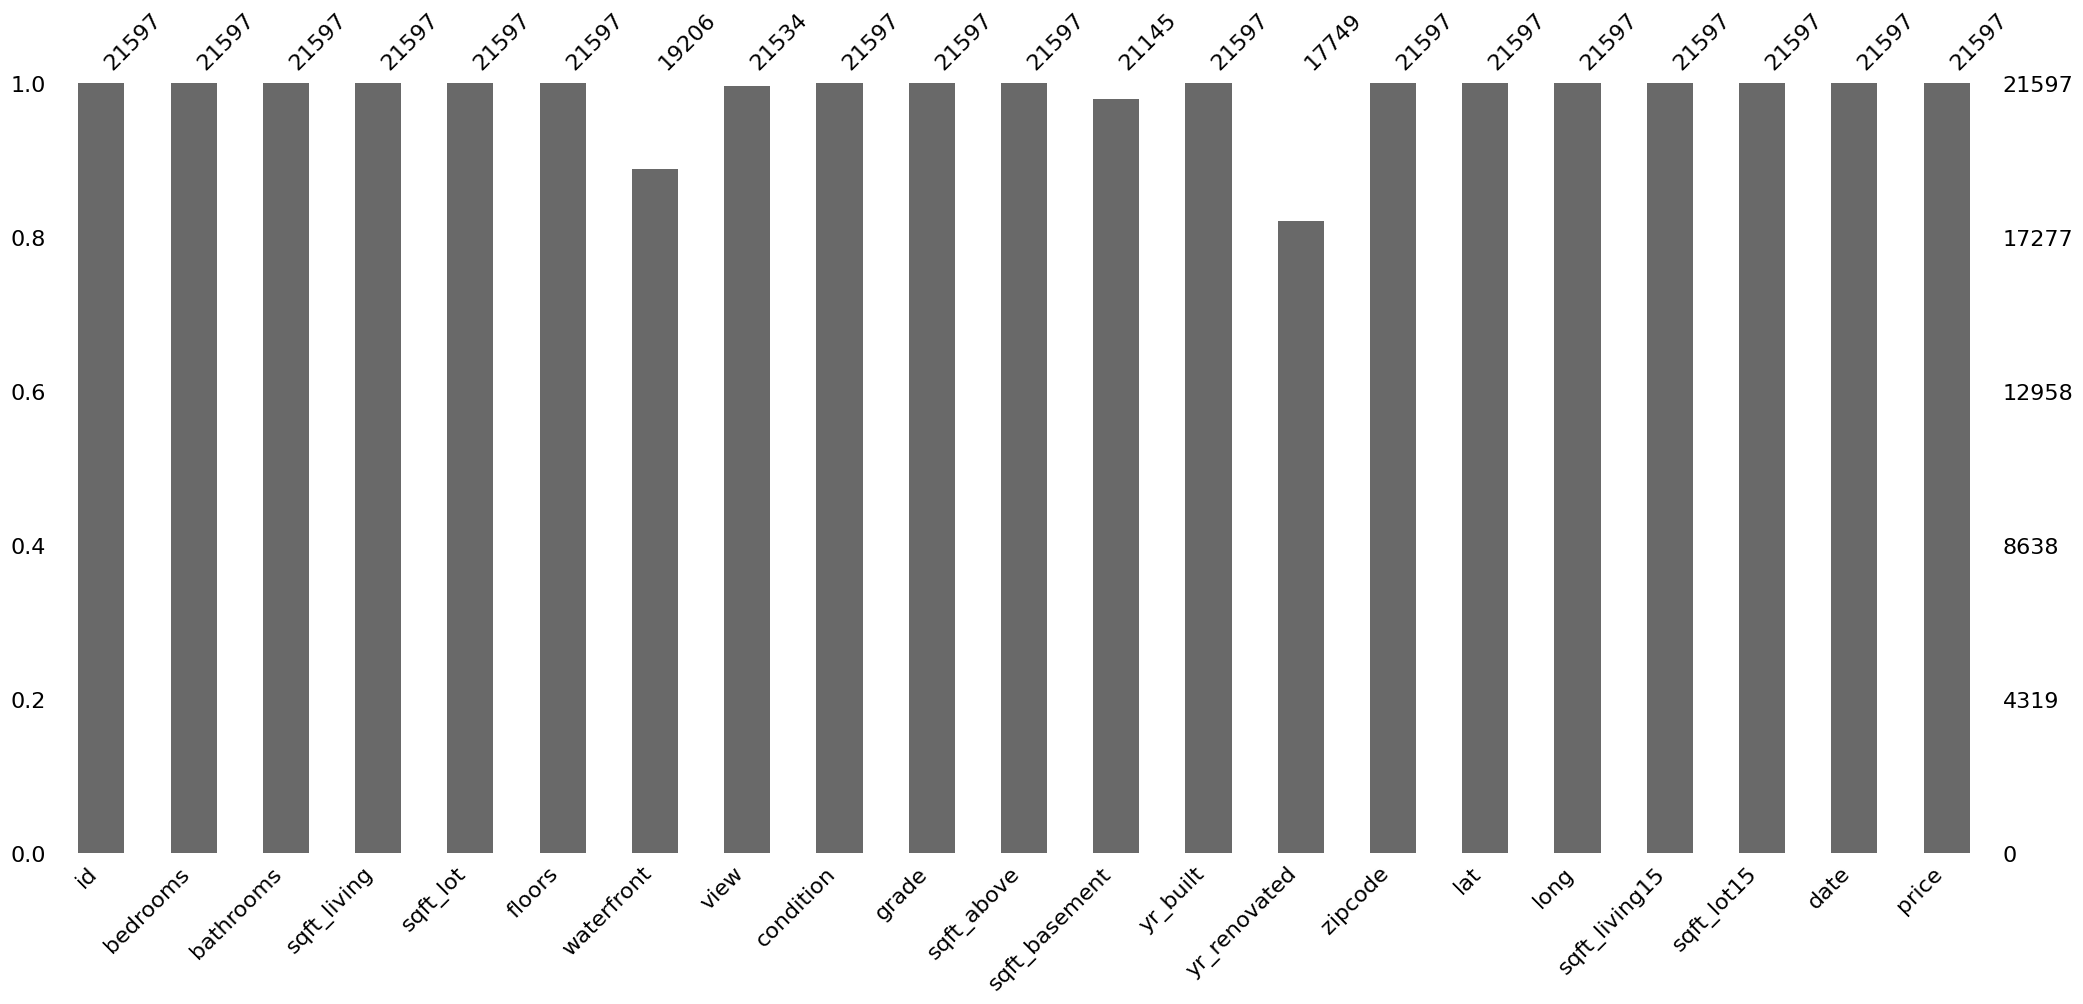

In [62]:
# plotting percentage of missing values per column
msno.bar(df)

<Axes: >

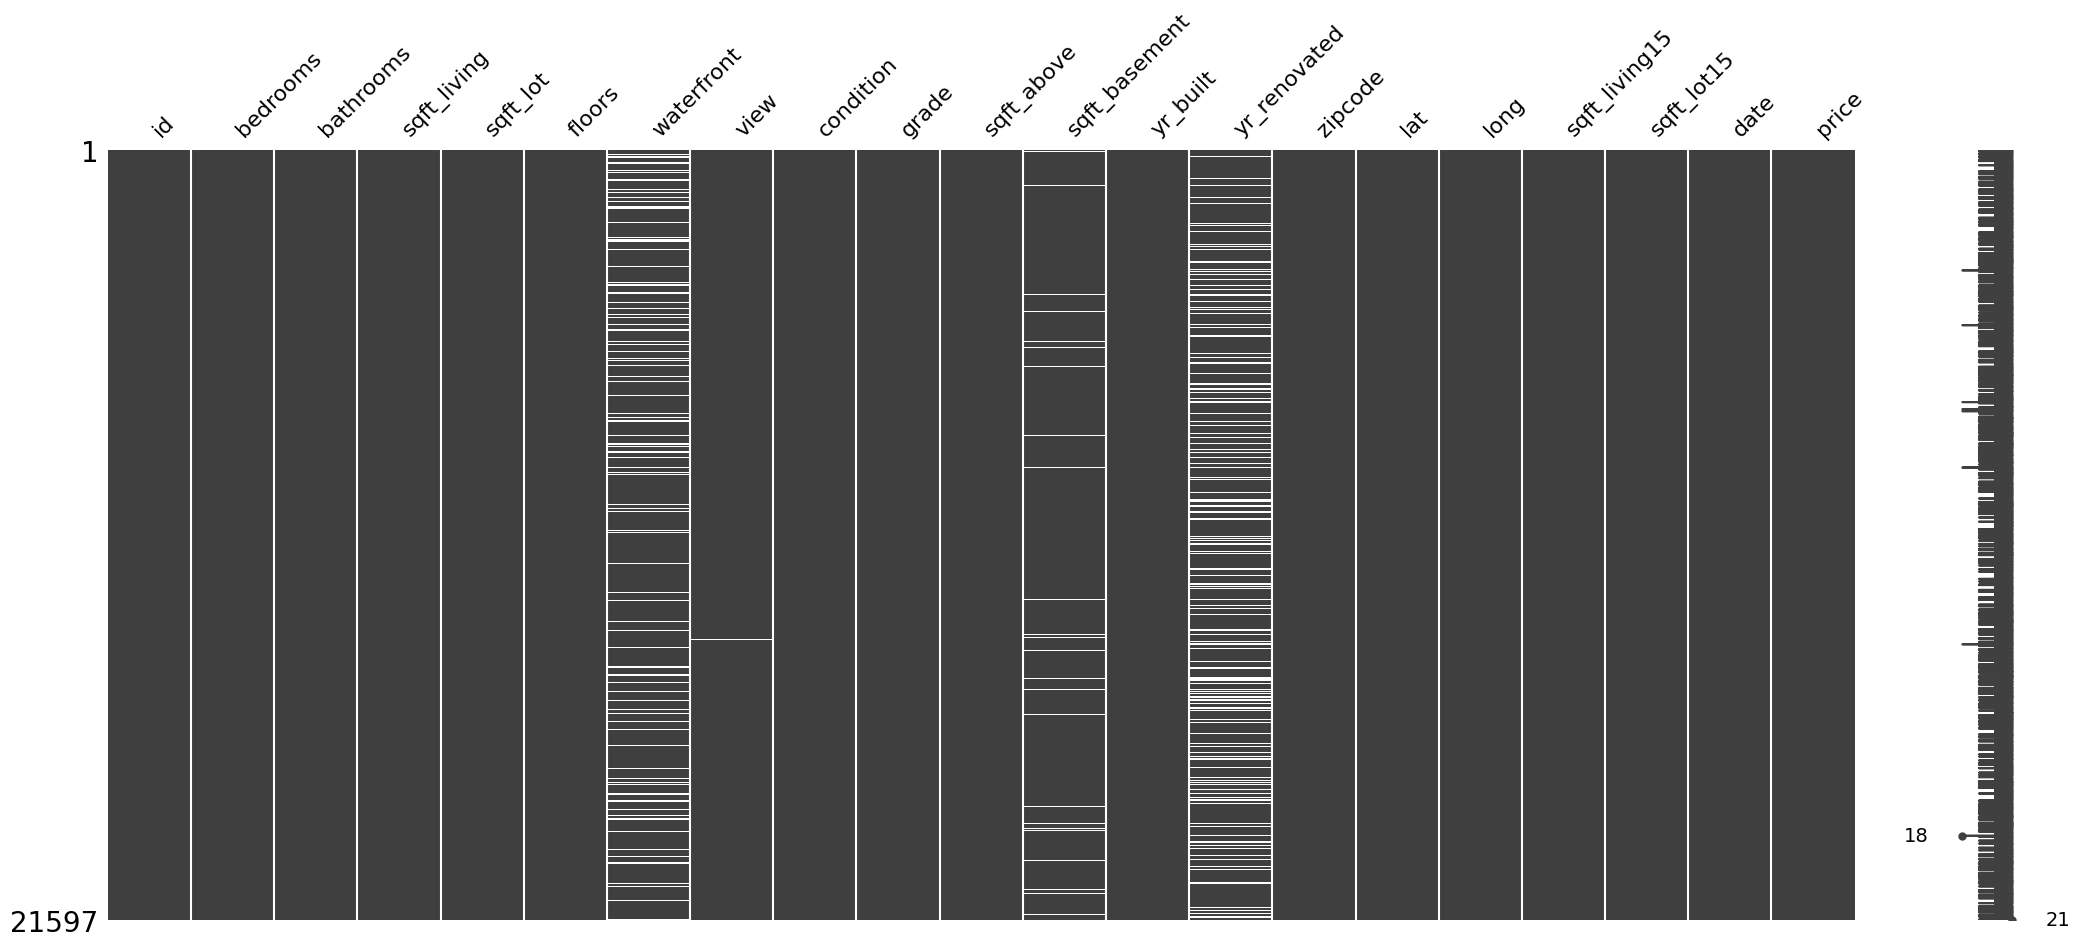

In [63]:
# plotting the matrix of missing values
msno.matrix(df)

There are few instances where missing values co-occur, and there appears to be no discernible pattern in the distribution of missing data. Consequently, it seems that the missing data occurs randomly.

The columns of the features 'waterfront', 'view', 'sqft_basement' and 'yr_renovated' have cell values of NaN/None, indicating missing data. <br> Except for these columns, we have 21597 non-null values in each of the other columns, which is exactly the same number as we have rows.   
<br> Meaning: We only seem to have missing values in the columns 'waterfront', 'view', 'sqft_basement' and 'yr_renovated'.

### Checking for Duplicate rows
In this section, we will identify and address any duplicate rows in the dataset. Duplicate rows can skew the results of our analysis by over-representing certain data points. We will check for duplicates, understand the reasons behind any repetitions, and determine the appropriate action, such as removing or consolidating these duplicates, to ensure the integrity of our dataset.

In [64]:
# check for duplicate rows in the id column
df["id"].duplicated().value_counts()

id
False    21420
True       177
Name: count, dtype: int64

The dataset contains data on 21,420 individual houses, spanning 21,597 rows. As a result, the 21,597 rows do not represent unique houses; instead, there are 21,420 unique properties. The presence of 177 duplicate rows suggests that several houses might have been sold more than once.

To determine whether these rows are exact duplicates or if the houses have been sold multiple times, the next step will involve checking the 'date' column for duplicate entries.

In [65]:
check_duplicates(df)

"There are no duplicates based on 'id' and 'date' together."

Therefore, these houses have been sold multiple times throughout their lifespan, causing them to appear in the dataset more than once.

To ensure the presentation of the most current house pricing, only the latest sales transactions will be retained

### Checking for Integer Floats
In this section, we will identify any float columns in the dataset that contain values which are effectively integers (i.e., values without any decimal places). These "integer floats" can often be converted to integer data types, which may simplify the analysis and reduce memory usage. By checking for and converting these values, we ensure that the data types used in our dataset accurately reflect the nature of the data.

In [66]:
check_float_columns_for_int_conversion(df)

{'bedrooms': True,
 'bathrooms': False,
 'sqft_living': True,
 'sqft_lot': True,
 'floors': False,
 'waterfront': True,
 'view': True,
 'sqft_above': True,
 'sqft_basement': True,
 'yr_renovated': True,
 'lat': False,
 'long': False,
 'sqft_living15': True,
 'sqft_lot15': True,
 'price': True}

### Checking for Boolean Columns

In this section, we will identify columns that can be considered boolean in the dataset. Understanding the potential boolean nature of column sis crucial for accurately analyzing its impact on property characteristics.

In [67]:
check_potential_boolean_columns(df)

['waterfront']

## Cleaning the Data
In this section, we will focus on cleaning the dataset to ensure that it is accurate, consistent, and ready for analysis. Data cleaning involves addressing issues such as missing values, incorrect data types, outliers, and inconsistencies. By systematically cleaning the data, we enhance its quality and reliability, laying a solid foundation for meaningful analysis and insights.

### Droping Columns
Since all the columns in the dataset are potentially relevant to the client's questions, hypotheses, and indicators outlined in the README.md, none of them will be dropped. Retaining all columns will allow for a more comprehensive exploration of the data and ensure that no potentially valuable information is excluded.

In [68]:
# drop columns that are not needed
# df.drop(["colunm_name"], axis=1, inplace=True)

### Transforming Data-Types

As mentioned earlier, some columns in the dataset have data types that need to be transformed to better align with their content. This step is crucial for ensuring that the data is correctly interpreted and can be efficiently analyzed. We will identify the columns requiring transformation and convert them to the appropriate data types to improve data processing and analysis. Specifically:

| Feature | Convert values to format |
|:-|:-|
| 'date' | datetime |
| 'yr_renovated', bedrooms', 'sqft_living','sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'price' | integer |
| 'waterfront' | boolian |
| 'view' | string |

In [69]:
# Convert values of the into datetime format
df['date'] = pd.to_datetime(df['date'], format='mixed', yearfirst=True)

In [70]:
# Convert values into integer format
df = convert_columns_to_integers(df)

In [71]:
# Convert values into boolean format
df = convert_to_boolean(df, 'waterfront')

### Rounding Floats

Floats (decimal numbers) should be displayed rounded to the last non-zero decimal place. This ensures that the data is presented in a more readable and precise format.

**Float Data Type**
| Feature that is a float data-type | Last non-zero decimal place |
|:-|:-|
| 'bathrooms' | 2 |
| 'floors' | 1 |
| 'lat' | 3 |
| 'long' | 3 |

Since lat and long are already rounded to 3 decimal places, only bathrooms and floors need to be rounded accordingly.

In [72]:
# Round the values of the feature 'bathrooms' in the specific column to 2 decimal places
df['bathrooms'] = df['bathrooms'].round(2)

In [73]:
# Round the values of the feature 'floors' in the specific column to 1 decimal place
df['floors'] = df['floors'].round(1)

### Dealing with Duplicate Rows
In this section, we will address any duplicate rows that exist in the dataset. To ensure that we present the most current house pricing, we will retain only the latest sales transactions. This will be accomplished by sorting the entries by date in descending order and keeping only the first occurrence of each, thereby eliminating any older duplicates.

In [74]:
df = remove_older_duplicates(df, id_column='id', date_column='date')

### Verifying the Changes: Previewing the DataFrame

To verify that our previous modifications (such as data type transformations and rounding) have been applied correctly, we will preview the first few rows of the DataFrame. This allows us to inspect the initial data and confirm that the changes have been implemented as expected.

In [75]:
# Check result
df.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
0,7129300520,3,1.00,1180,5650,1.0,NaN,0.0,3,7,...,0,1955,<NA>,98178,47.5112,-122.257,1340,5650,2014-10-13,221900
1,6414100192,3,2.25,2570,7242,2.0,no,0.0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014-12-09,538000
2,5631500400,2,1.00,770,10000,1.0,no,0.0,3,6,...,0,1933,<NA>,98028,47.7379,-122.233,2720,8062,2015-02-25,180000
3,2487200875,4,3.00,1960,5000,1.0,no,0.0,5,7,...,910,1965,<NA>,98136,47.5208,-122.393,1360,5000,2014-12-09,604000
4,1954400510,3,2.00,1680,8080,1.0,no,0.0,3,8,...,0,1987,<NA>,98074,47.6168,-122.045,1800,7503,2015-02-18,510000


## Feature engineering
In this section, we will focus on feature engineering, a crucial step in enhancing the dataset by creating new features or transforming existing ones to better capture the underlying patterns in the data. Through feature engineering, we aim to improve the dataset's relevance and predictive power, making it more aligned with the hypotheses or analysis goals. This process may involve creating new variables, combining or transforming existing features, and encoding categorical variables to ensure they contribute effectively to the analysis.

### Calculate the Distance From Seattle's Center
In this step, we will calculate the distance from each property to the center of Seattle, which is located at latitude 47.6062 and longitude -122.3321, according to Google Maps. We will use the geodesic method to compute the distance in miles. The calculated distance will then be added to the DataFrame as a new column named dist_center, providing a useful feature for further analysis.

In [76]:
# Apply the function row-wise and create a new column 'dist_center'
df['mile_dist_center'] = df.apply(distance_to_center, axis=1)

### Calculate the Actual Age at the Time of Sale
Next, we will calculate the actual age of each house at the time it was sold. This is done by subtracting the year the house was built (yr_built) from the year of the sale (date). The resulting value will be added as a new column, age_at_sale, in the DataFrame, providing an important feature for understanding the relationship between a house's age and its sale price.

In [77]:
df['age_at_sale'] = df['date'].dt.year - df['yr_built']

### Calculate a Binary Indicator for Renovation
We will now create a binary indicator to determine whether each house was ever renovated. This will be done by examining the yr_renovated column: if the value is NaN or 0, it indicates that the house was not renovated, and we will label it as 'unrenovated'; otherwise, it will be labeled as 'renovated'. This new indicator will be added to the DataFrame as a column named renovation_status, providing a clear feature to distinguish between renovated and unrenovated houses.

In [78]:
df['renovation_status'] = df['yr_renovated'].apply(lambda x: 'unrenovated' if pd.isna(x) else 'renovated')

### Calculate the Years Since Renovation
Next, we will calculate the number of years since the last renovation for each house. This will be done by subtracting the renovation year (yr_renovated) from the year of the sale (date). If a house has never been renovated (indicated by yr_renovated being NaN or 0), we will set the value to 0 to indicate that no renovation has occurred. This new feature will be added to the DataFrame as a column named yrs_since_renovation, providing insight into how recent renovations may impact the house's sale price.

In [79]:
df['yrs_since_renovation'] = df['date'].dt.year - df['yr_renovated']

### Calculate the Price per Square Foot
In this step, we will calculate the price per square foot for each property. This metric is obtained by dividing the sale price (price) by the total living area in square feet (sqft_living). The resulting value will be added as a new column named price_per_sqft in the DataFrame. This feature will be useful for later comparisons, providing a standardized way to assess property values relative to their size.

In [80]:
df['price_per_sqft'] = df['price'] / df['sqft_living']

### Categorize Houses by Location: City vs. Countryside
In this step, we will categorize the houses based on their location relative to the city of Seattle. We will define properties within the official city limits of Seattle as being in the 'city' and those outside as being in the 'countryside'. This categorization will be added to the DataFrame as a new column named location_type, allowing for comparisons between urban and rural properties in the analysis.

There are several ways to do that:

- **Geographic Boundaries**
    If the geographic boundaries that typically separate urban from rural areas around Seattle are known, you can categorize houses based on whether their coordinates fall within those boundaries.

- **Population Density**
    Areas with higher population densities are typically considered urban, while lower densities suggest rural areas. If you have access to population density data by region, you could use this to categorize houses.

- **Proximity to City Center**
    A common approach is to define a distance from a central point in the city (e.g., downtown Seattle) and classify houses within a certain radius as "city" and those outside as "countryside." This method assumes that urban characteristics diminish with distance from the city center.

- **Use of Administrative Boundaries**
    Utilizing administrative boundaries such as city limits or postal codes (zipcodes) can also help. Houses within city limits might be classified as "city," while those outside could be considered "countryside."

The data given in the dataframe allows in principle for using the proximitty to the city center (features: 'lan', 'long') as well as the use of administrative boundaries (feature: 'zipcode'). Since Seattle is rather elongated along the sea, the (radial) proximitty method might not reflect the city / countrside boundary well. Therefore, in the following, the administrative boundaries will be used for the classification.

Seattle, being a major city, encompasses a variety of ZIP codes across its diverse neighborhoods. While the list of ZIP codes can evolve slightly over time due to changes in postal routes or city planning decisions, here's a comprehensive list of ZIP codes generally considered to be within Seattle city limits as of my last update bases on the webpage of the city of Seattle (https://www.seattle.gov):

| Zipcode | Name of the District |
|:-|:-|
| 98101 | Downtown Seattle |
| 98102 | Capitol Hill |
| 98103 | Greenwood, Fremont, Green Lake |
| 98104 | Pioneer Square, Chinatown |
| 98105 | University District, Laurelhurst |
| 98106 | West Seattle, South Park |
| 98107 | Ballard |
| 98108 | Georgetown, South Park |
| 98109 | South Lake Union, Queen Anne |
| 98112 | Madison Park, Capitol Hill |
| 98115 | Ravenna, Wedgwood |
| 98116 | West Seattle |
| 98117 | Ballard, Crown Hill |
| 98118 | Rainier Valley, Seward Park |
| 98119 | Queen Anne |
| 98121 | Belltown, Downtown Seattle |
| 98122 | Central District, Capitol Hill |
| 98125 | Lake City, Northgate |
| 98126 | West Seattle |
| 98133 | North Seattle, part of Shoreline |
| 98134 | Industrial District |
| 98136 | West Seattle |
| 98144 | Mount Baker, Leschi, Beacon Hill |
| 98146 | West Seattle, part of Burien |
| 98154 | Downtown Seattle (mostly commercial) |
| 98164 | Downtown Seattle (PO boxes) |
| 98174 | Downtown Seattle (PO boxes) |
| 98177 | North Seattle, part of Shoreline |
| 98178 | Rainier Beach, Skyway (parts) |
| 98195 | University of Washington Campus |
| 98199 | Magnolia |

Note: ZIP codes like 98133 and 98177 also cover areas in the city of Shoreline, which is directly north of Seattle, and 98146 includes parts of Burien to the south. Additionally, some ZIP codes are primarily used for PO boxes or specific commercial buildings, which might not correspond to residential areas.

This list provides a snapshot of Seattle's ZIP codes, useful for classifying locations within the city versus the countryside or suburban areas.

We categorize each property as either being in the city of Seattle or in the surrounding countryside, using ZIP codes as a geographical identifier:

In [81]:
df['location_type'] = df['zipcode'].apply(classify_by_zip_code)

### Mapping and Categorizing Property 'View'

In this section, we will enhance the readability and interpretability of the dataset by mapping numeric condition of the 'view' feature ratings to descriptive labels. This step involves converting the numerical condition scores into meaningful categories such as "No View", "Limited View", "Partial View", "Good View", and "Excellent View". We will also ensure that these categories are ordered appropriately for subsequent analysis.

In [82]:
view_mapping = {
    0.000: "No View",
    1.000: "Limited View",
    2.000: "Partial View",
    3.000: "Good View",
    4.000: "Excellent View"
}

view_order = ["No View", "Limited View", "Partial View",  "Good View", "Excellent View"]

df = descriptive_label_mapping(df, 'view', view_mapping, view_order)

### Mapping and Categorizing Property 'Condition'

In this section, we will enhance the readability and interpretability of the dataset by mapping numeric condition ratings of the feature 'Condition' to descriptive labels. This step involves converting the numerical condition scores into meaningful categories such as “Poor,” “Fair,” “Average,” “Good,” and “Excellent.” We will also ensure that these categories are ordered appropriately for subsequent analysis.

In [83]:
condition_mapping = {
    1: "Poor",
    2: "Fair",
    3: "Average",
    4: "Good",
    5: "Excellent"
}

condition_order = ["Poor", "Fair", "Average", "Good", "Excellent"]

df = descriptive_label_mapping(df, 'condition', condition_mapping, condition_order)

### Mapping and Categorizing Property 'Grade'

In this section, we will convert the numerical property grade scores into descriptive labels that better reflect the quality of the homes. This involves mapping the grade numbers to categories such as “Very Poor,” “Good,” and “Exceptional,” making the dataset more intuitive and easier to analyze. AWe will also ensure that these categories are ordered appropriately for subsequent analysis.

In [84]:
# Define the mapping from grade numbers to descriptive labels
grade_mapping = {
    3: "Very Poor",
    4: "Poor",
    5: "Below Average",
    6: "Fair",
    7: "Average",
    8: "Good",
    9: "Very Good",
    10: "Excellent",
    11: "Outstanding",
    12: "Superior",
    13: "Exceptional"
}

grade_order = ["Very Poor", "Poor", "Below Average", "Fair", "Average", 
               "Good", "Very Good", "Excellent", "Outstanding", 
               "Superior", "Exceptional"]

df = descriptive_label_mapping(df, 'grade', grade_mapping, grade_order)

## Closing

### Verifying the Changes: Previewing the DataFrame

To ensure that our feature engineering has been applied correctly, we will preview the columns and the first few rows of the DataFrame. This step allows us to inspect the updated data and confirm that the new features and modifications have been implemented as intended.

In [85]:
# Previewing the columns
print(df.columns)

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price', 'mile_dist_center',
       'age_at_sale', 'renovation_status', 'yrs_since_renovation',
       'price_per_sqft', 'location_type', 'view_cat', 'condition_cat',
       'grade_cat'],
      dtype='object')


In [86]:
# Previewing the first few rows
df.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,price,mile_dist_center,age_at_sale,renovation_status,yrs_since_renovation,price_per_sqft,location_type,view_cat,condition_cat,grade_cat
0,7129300520,3,1.00,1180,5650,1.0,NaN,0.0,3,7,...,221900,7.443664,59,unrenovated,<NA>,188.050847,city,No View,Average,Average
1,6414100192,3,2.25,2570,7242,2.0,no,0.0,3,7,...,538000,7.954648,63,renovated,23,209.338521,city,No View,Average,Average
2,5631500400,2,1.00,770,10000,1.0,no,0.0,3,6,...,180000,10.206394,82,unrenovated,<NA>,233.766234,countryside,No View,Average,Fair
3,2487200875,4,3.00,1960,5000,1.0,no,0.0,5,7,...,604000,6.551165,49,unrenovated,<NA>,308.163265,city,No View,Excellent,Average
4,1954400510,3,2.00,1680,8080,1.0,no,0.0,3,8,...,510000,13.432452,28,unrenovated,<NA>,303.571429,countryside,No View,Average,Good


The DataFrame looks great and has been successfully prepared with all necessary features and modifications. It is now ready to be saved as a CSV file for further processing and analysis.

### Save the Order of Descriptive Labels in a JSON File

In [87]:
# Condition Label Order
json_path_view = '../data/view_order.json'

with open(json_path_view, 'w') as f:
    json.dump(view_order, f)

# Condition Label Order
json_path_condition = '../data/condition_order.json'

with open(json_path_condition, 'w') as f:
    json.dump(condition_order, f)

# Grade Label Order
json_path_grade = '../data/grade_order.json'

with open(json_path_grade, 'w') as f:
    json.dump(grade_order, f)

### Save the Data to a CSV File
Save the data to a CSV file for further analysis.

In [88]:
df.to_csv("../data/king_county_housing_data_cleaned_and_preprocessed.csv", index=False)